## detect whether all bolts have been installed on a certain part of machine

In [1]:
%matplotlib inline

In [2]:
from skimage import io, feature, transform, draw, color, util, filters, morphology, measure
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import patches

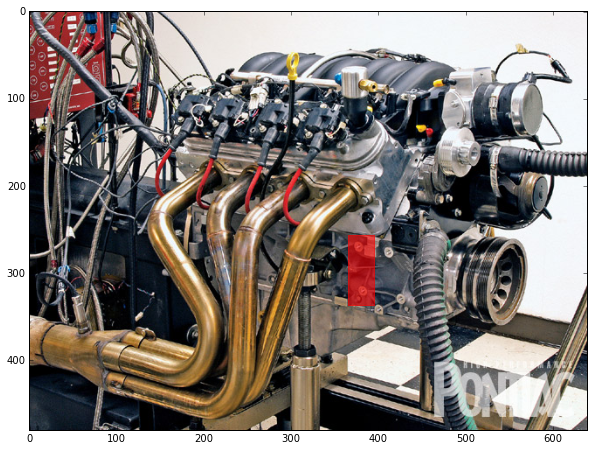

In [3]:
## get the image from online
image_url = "http://image.highperformancepontiac.com/f/16749142/hppp_0904_01_z+418ci_engine_assembly+418ci_engine.jpg"
machine = io.imread(image_url)
fig, ax = plt.subplots(1, 1, figsize = (10, 10))
ax.imshow(machine)
ax.autoscale(False)
ax.add_patch(patches.Rectangle((365, 256), 395-365, 336-256, color = "red", alpha = 0.6))

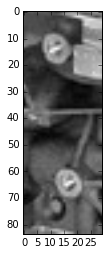

In [18]:
## region of interest -- count how many bolts in the area 
img = color.rgb2gray(machine) 
roi = img[256:340, 365:395]
color_roi = machine[256:340, 365:395]
plt.imshow(roi, cmap = plt.cm.gray)

In [5]:
binary = (roi > filters.threshold_otsu(roi))
binary = morphology.binary_opening(binary, selem = morphology.disk(1.))
binary = morphology.remove_small_objects(binary, min_size=20)
#plt.imshow(binary, cmap = plt.cm.gray)
edges = feature.canny(util.img_as_ubyte(binary), sigma=1.5, low_threshold=10, high_threshold=50)
#plt.figure()
#plt.imshow(edges)

In [6]:
## use hough transformation to detect roundshape bolts
radii = np.arange(3, 12, )
houghs = transform.hough_circle(edges, radii, )

circle_rcs = []
circle_probs = []
circle_radii = []
for hough, radius in zip(houghs, radii):
    num_peaks=3
    centers = feature.peak_local_max(hough, num_peaks=num_peaks, indices=True) #row, col
    probs = hough[centers[:, 0], centers[:, 1]]
    circle_rcs.extend(centers)
    circle_probs.extend(probs)
    circle_radii.extend([radius] * num_peaks)

12 14 4
17 65 4


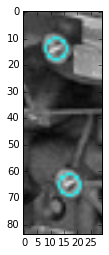

In [15]:
## plot the best fit
plot_img = color.gray2rgb(roi)
for i in np.argsort(circle_probs)[::-1][:2]:
    cx, cy = draw.circle_perimeter(circle_rcs[i][1], circle_rcs[i][0], circle_radii[i])
    plot_img[cy, cx] = (220, 20, 20)
    print circle_rcs[i][1], circle_rcs[i][0], circle_radii[i]
plt.imshow(plot_img)

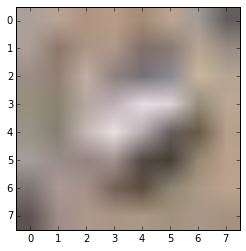

In [42]:
bolt = color_roi[14-4:14+4, 12-4:12+4]
bolt = color_roi[65-4:65+4, 17-4:17+4]
plt.imshow(bolt)

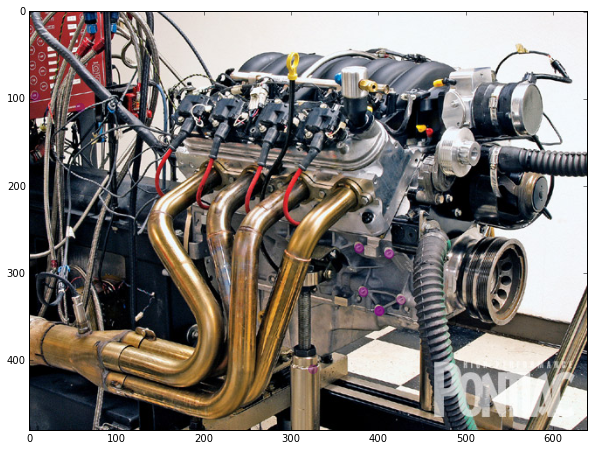

In [48]:
## now try to find all the similar look bolts


fig, ax = plt.subplots(1, 1, figsize = (10, 10))
ax.imshow(machine)
ax.autoscale(False)

bolt = color_roi[14-4:14+4, 12-4:12+4]
match = feature.match_template(machine, bolt, )
#_ = plt.hist(np.abs(match.ravel()), bins = 50)
thr = np.percentile(np.abs(match.ravel()), 99.997)
rs, cs = np.where(match[:, :, 0] >= thr)
for r, c in zip(rs, cs):
    ax.add_patch(patches.Circle((c+5, r+5), 5, color = "purple", alpha = 0.3))
    
bolt = color_roi[65-4:65+4, 17-4:17+4]
match = feature.match_template(machine, bolt, )
#_ = plt.hist(np.abs(match.ravel()), bins = 50)
thr = np.percentile(np.abs(match.ravel()), 99.997)
rs, cs = np.where(match[:, :, 0] >= thr)
for r, c in zip(rs, cs):
    ax.add_patch(patches.Circle((c+5, r+5), 5, color = "purple", alpha = 0.3))